In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('EmployeeAttrition.csv')

## Data Preprocessing

In [3]:
data = data.dropna()

# Encode categorical variables using Label Encoding (you can use one-hot encoding too)
label_encoder = LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])


# Select only categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Now, 'data_encoded' contains one-hot encoded values for all categorical columns

# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['Attrition'])
y = data_encoded['Attrition']

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create a Logistic Regression model
model_lr = LogisticRegression(solver='saga', max_iter=1000)

# Fit the model to the training data
model_lr.fit(X_train, y_train)


C:\Users\chait\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

### Decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
model_dt = DecisionTreeClassifier()

# Fit the model to the training data
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

## Performance Metrics

### For Logistic Regression model

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For Logistic Regression
lr_predictions = model_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)

# For Decision Tree
dt_predictions = model_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)


C:\Users\chait\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Displayed the metrics by creating a pandas dataframe

In [9]:
metrics_dict = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [lr_accuracy, dt_accuracy],
    'Precision': [lr_precision, dt_precision],
    'Recall': [lr_recall, dt_recall],
    'F1 Score': [lr_f1_score, dt_f1_score],
    'ROC-AUC': [lr_roc_auc, dt_roc_auc]
}
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.867347   0.000000  0.000000  0.000000  0.500000
1        Decision Tree  0.782313   0.209302  0.230769  0.219512  0.548718


## Data Visualization

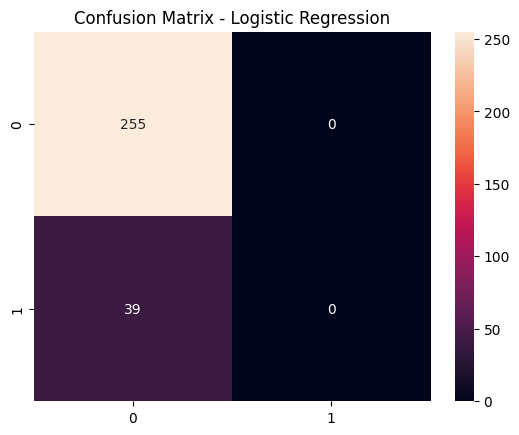

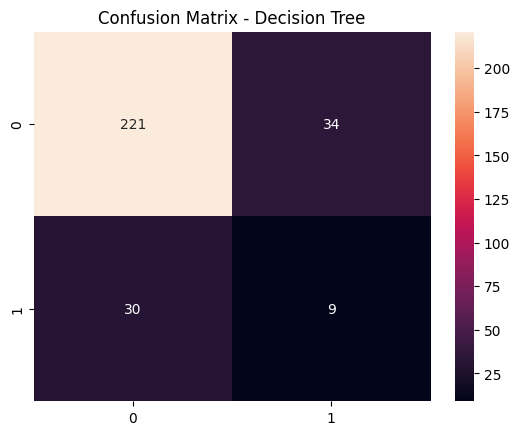

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt="d")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


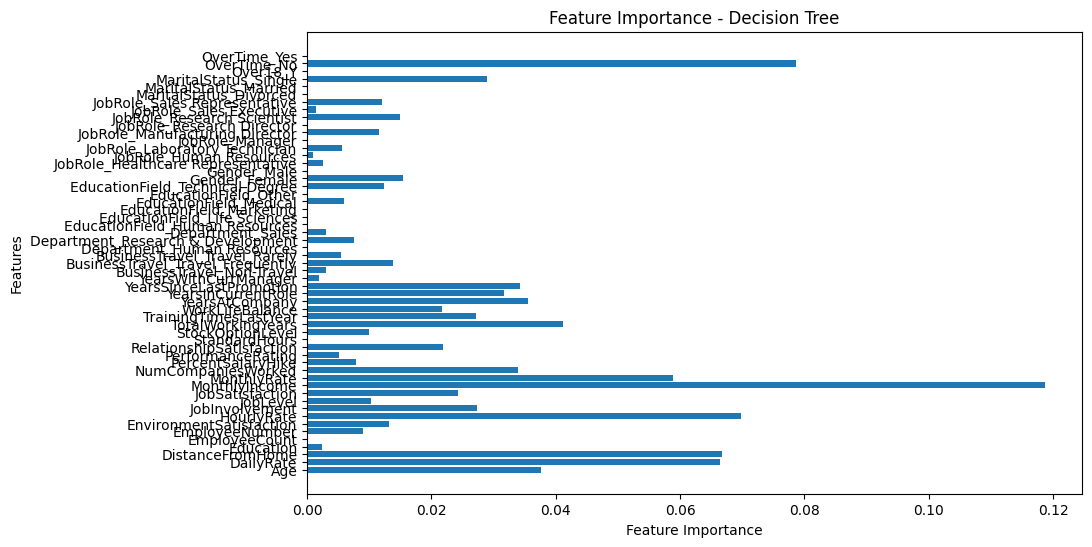

In [11]:
feature_importance = model_dt.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Decision Tree')
plt.show()


#### Done by Chaitanya Chilukuri